In [860]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import warnings

In [861]:
df = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv")
data = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset.csv")
data1 = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset Updated.csv")

In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [863]:
import pandas as pd

# Assuming your dataset is in a DataFrame named 'df'
# If not, load your dataset into a DataFrame first

# Convert the 'Departure Date' column to a Pandas datetime object
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Extract 'Departure Month', 'Departure Day', and 'Departure Year'
df['Month'] = df['Departure Date'].dt.month
df['Day'] = df['Departure Date'].dt.day
df['Year'] = df['Departure Date'].dt.year




In [864]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Month,Day,Year
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,6.0,28.0,2022.0
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,12.0,26.0,2022.0
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,1.0,18.0,2022.0
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,9.0,16.0,2022.0
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,2.0,25.0,2022.0


In [865]:
# Create a list of the columns you want to keep
columns_to_keep = [
    'Gender', 'Age', 'Nationality', 'Airport Name', 'Country Name',
    'Continents', 'Arrival Airport', 'Flight Status', 'Month', 'Day'
]

# Select only the desired columns in your DataFrame
df = df[columns_to_keep]




In [866]:
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


In [867]:
 #Replace name some features
df.rename(columns={"Airport Name": "Airport_Name",
                  "Country Name": "Country_Name",
                  "Arrival Airport": "Arrival_Airport",
                  "Flight Status": "Flight_Status"},inplace = True)


In [868]:
df.head()

,Gender,Age,Nationality,Airport_Name,Country_Name,Continents,Arrival_Airport,Flight_Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


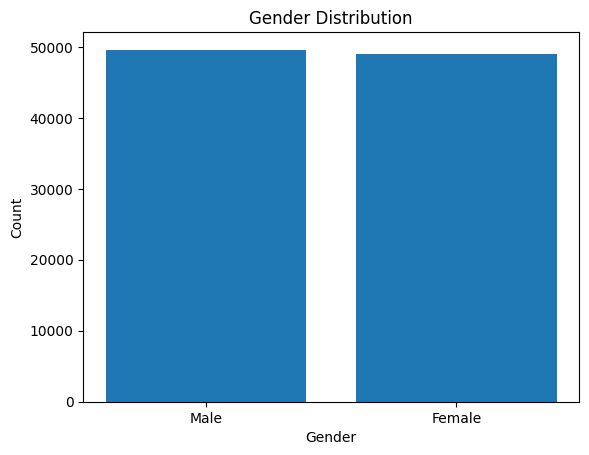

In [869]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a bar plot for gender distribution
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Show the plot
plt.show()


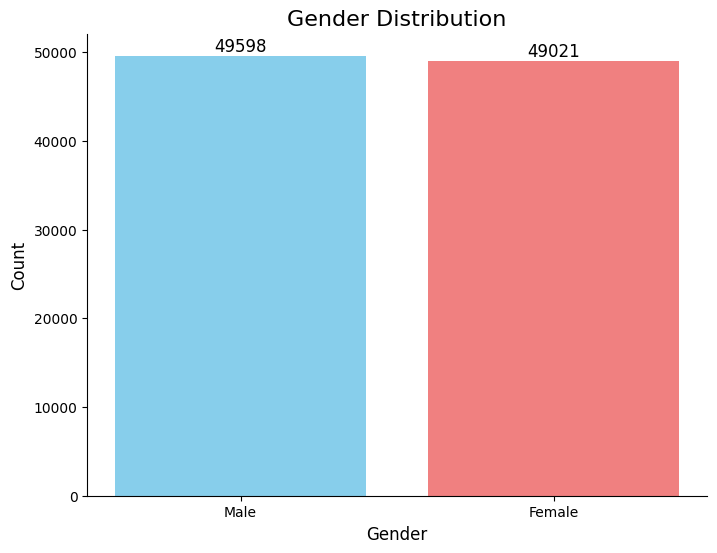

In [870]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a bar plot for gender distribution with custom colors
gender_counts = df['Gender'].value_counts()
colors = ['skyblue', 'lightcoral']  # Custom colors for Female and Male

plt.figure(figsize=(8, 6))  # Adjust the figure size

# Create a bar plot with custom colors
plt.bar(gender_counts.index, gender_counts.values, color=colors)

# Add labels and title
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Gender Distribution', fontsize=16)

# Add data labels on the bars
for i, count in enumerate(gender_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


Text(0, 0.5, 'Count')

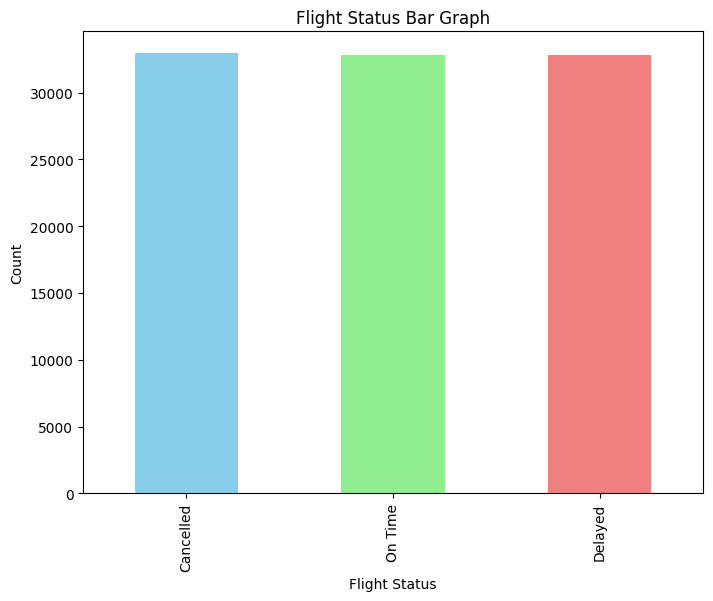

In [871]:
flight_status_counts = df['Flight_Status'].value_counts()

# Define colors for each flight status
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a bar plot with colors
plt.figure(figsize=(8, 6))
flight_status_counts.plot(kind='bar', color=colors)
plt.title('Flight Status Bar Graph')
plt.xlabel('Flight Status')
plt.ylabel('Count')

In [872]:
print(df.groupby("Flight_Status")["Gender"].value_counts())


Flight_Status  Gender
Cancelled      Male      16490
               Female    16452
Delayed        Male      16540
               Female    16291
On Time        Male      16568
               Female    16278
Name: count, dtype: int64


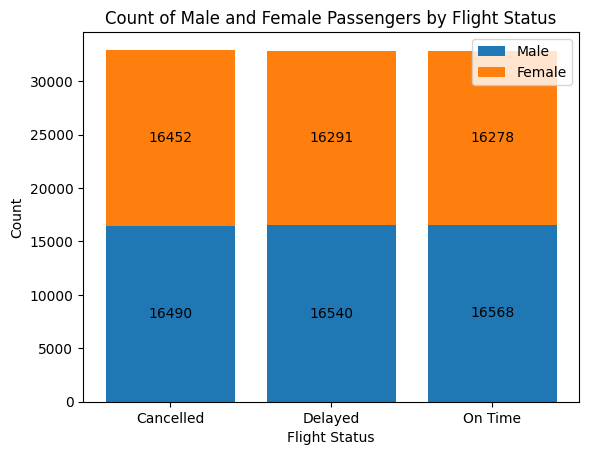

In [873]:
import numpy as np
import matplotlib.pyplot as plt

# Flight Status categories
flight_status = ["Cancelled", "Delayed", "On Time"]

# Count of passengers by gender and flight status
sex_counts = {
    "Male": np.array([16490, 16540, 16568]),
    "Female": np.array([16452, 16291, 16278])
}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for sex, sex_count in sex_counts.items():
    p = ax.bar(flight_status,sex_count,label = sex, bottom = bottom)
    bottom+=sex_count
    ax.bar_label(p, label_type = "center")
    
ax.legend()
plt.title('Count of Male and Female Passengers by Flight Status')
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.show()


In [874]:
print(df.groupby("Continents")["Flight_Status"].value_counts())


Continents     Flight_Status
Africa         On Time           3719
               Cancelled         3657
               Delayed           3654
Asia           On Time           6242
               Cancelled         6235
               Delayed           6160
Europe         Delayed           4178
               Cancelled         4095
               On Time           4062
North America  Delayed          10696
               Cancelled        10693
               On Time          10644
Oceania        Delayed           4634
               Cancelled         4619
               On Time           4613
South America  Cancelled         3643
               On Time           3566
               Delayed           3509
Name: count, dtype: int64


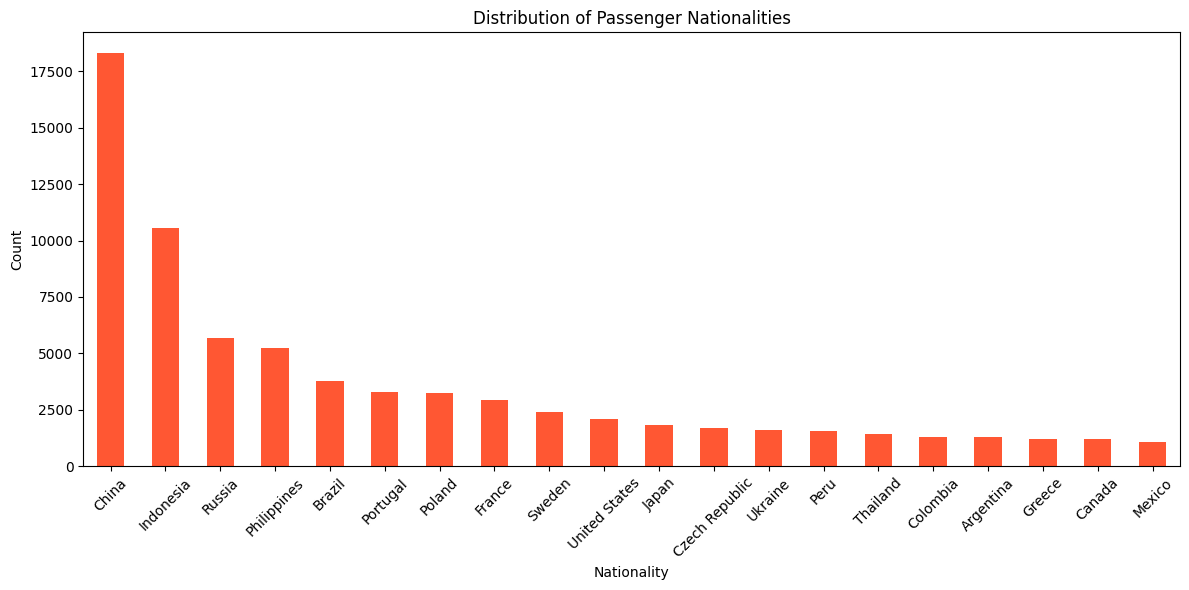

In [875]:
# Count of passenger nationalities
nationality_counts = df['Nationality'].value_counts().head(20)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
nationality_counts.plot(kind='bar', color='#FF5733')
plt.title('Distribution of Passenger Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

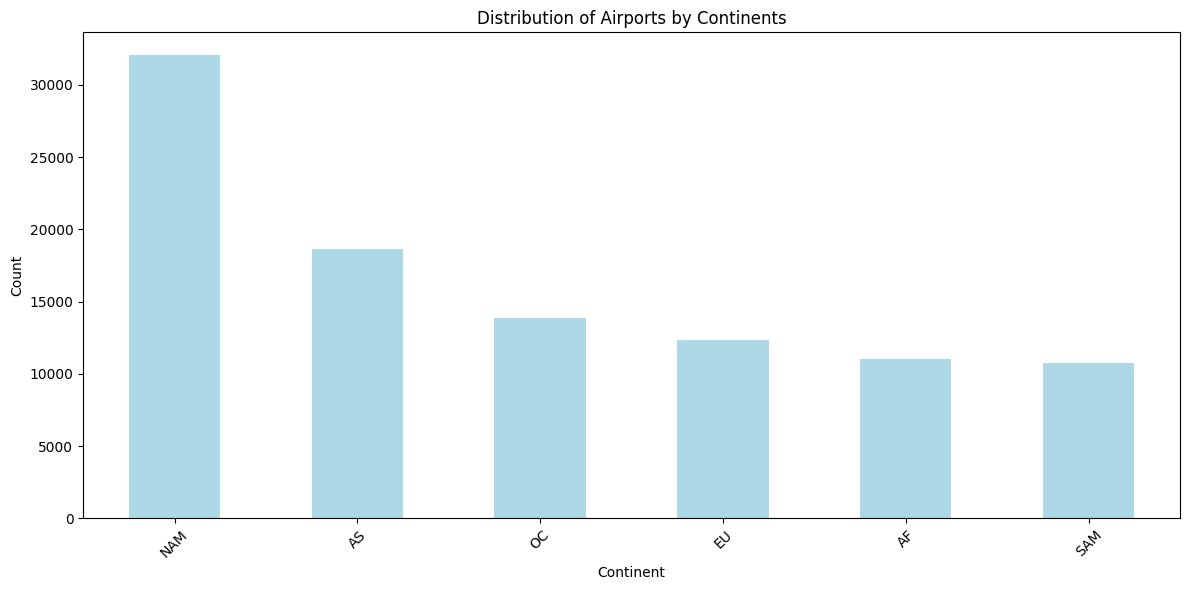

In [876]:
df = pd.DataFrame(data)

# Count of airports by continent
airport_counts = df['Airport Continent'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
airport_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Airports by Continents')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

In [877]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time


In [878]:
# df = pd.get_dummies(df, columns=['Airport Name'])


In [879]:
df = pd.get_dummies(df, columns=['Gender', 'Nationality','Flight Status'])

In [880]:
df.head()

,Passenger ID,First Name,Last Name,Age,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,...,Nationality_Venezuela,Nationality_Vietnam,Nationality_Wallis and Futuna,Nationality_Western Sahara,Nationality_Yemen,Nationality_Zambia,Nationality_Zimbabwe,Flight Status_Cancelled,Flight Status_Delayed,Flight Status_On Time
0,10856,Edithe,Leggis,62,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,...,False,False,False,False,False,False,False,False,False,True
1,43872,Elwood,Catt,62,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,...,False,False,False,False,False,False,False,False,False,True
2,42633,Darby,Felgate,67,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,...,False,False,False,False,False,False,False,False,False,True
3,78493,Dominica,Pyle,71,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,...,False,False,False,False,False,False,False,False,True,False
4,82072,Bay,Pencost,21,Gillespie Field,US,United States,NAM,North America,2/25/2022,...,False,False,False,False,False,False,False,False,False,True


In [881]:
import pandas as pd
df = pd.read_csv("/kaggle/input/airline-dataset/Airline Dataset Updated - v2.csv")


In [882]:
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [883]:
df = df.dropna()

In [884]:
# Convert the 'Departure Date' column to a Pandas datetime object
df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')

# Extract 'Departure Month', 'Departure Day', and 'Departure Year'
df['Month'] = df['Departure Date'].dt.month
df['Day'] = df['Departure Date'].dt.day
df['Year'] = df['Departure Date'].dt.year

In [885]:
# Create a list of the columns you want to keep
columns_to_keep = [
    'Gender', 'Age', 'Nationality', 'Airport Name', 'Country Name',
    'Continents', 'Arrival Airport', 'Flight Status', 'Month', 'Day'
]

# Select only the desired columns in your DataFrame
df = df[columns_to_keep]

In [886]:
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


In [887]:
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0


In [888]:
# Define the 'dep' variable
dep = 'label'

# Set the label as 1 for 'On Time' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'On Time', dep] = 1

# Set the label as 2 for 'Delayed' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'Delayed', dep] = 0

# Set the label as 3 for 'Cancelled' flights in the 'df' DataFrame
df.loc[df['Flight Status'] == 'Cancelled', dep] = 0

In [889]:
df.head()

,Gender,Age,Nationality,Airport Name,Country Name,Continents,Arrival Airport,Flight Status,Month,Day,label
0,Female,62,Japan,Coldfoot Airport,United States,North America,CXF,On Time,6.0,28.0,1.0
1,Male,62,Nicaragua,Kugluktuk Airport,Canada,North America,YCO,On Time,12.0,26.0,1.0
2,Male,67,Russia,Grenoble-Isère Airport,France,Europe,GNB,On Time,1.0,18.0,1.0
3,Female,71,China,Ottawa / Gatineau Airport,Canada,North America,YND,Delayed,9.0,16.0,0.0
4,Male,21,China,Gillespie Field,United States,North America,SEE,On Time,2.0,25.0,1.0


In [890]:
# List of features to one-hot encode
features_to_encode = ["Gender", "Nationality", "Airport Name"]

# One-hot encode only the specified features
df_encoded = pd.get_dummies(df, columns=features_to_encode, prefix=features_to_encode)

# Concatenate the one-hot encoded DataFrame with the remaining columns
df_combined = pd.concat([df_encoded, df.drop(columns=features_to_encode)], axis=1)

df_combined.head()

,Age,Country Name,Continents,Arrival Airport,Flight Status,Month,Day,label,Gender_Female,Gender_Male,...,Airport Name_Žabljak Airport,Airport Name_Žilina Airport,Age,Country Name,Continents,Arrival Airport,Flight Status,Month,Day,label
0,62,United States,North America,CXF,On Time,6.0,28.0,1.0,True,False,...,False,False,62,United States,North America,CXF,On Time,6.0,28.0,1.0
1,62,Canada,North America,YCO,On Time,12.0,26.0,1.0,False,True,...,False,False,62,Canada,North America,YCO,On Time,12.0,26.0,1.0
2,67,France,Europe,GNB,On Time,1.0,18.0,1.0,False,True,...,False,False,67,France,Europe,GNB,On Time,1.0,18.0,1.0
3,71,Canada,North America,YND,Delayed,9.0,16.0,0.0,True,False,...,False,False,71,Canada,North America,YND,Delayed,9.0,16.0,0.0
4,21,United States,North America,SEE,On Time,2.0,25.0,1.0,False,True,...,False,False,21,United States,North America,SEE,On Time,2.0,25.0,1.0


In [891]:
df_combined = df_combined.dropna()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X, y)

best_model_rf = grid_search_rf.best_estimator_

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
grid_search_lr.fit(X, y)

best_model_lr = grid_search_lr.best_estimator_

# Hyperparameter tuning for KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X, y)

best_model_knn = grid_search_knn.best_estimator_

# Hyperparameter tuning for Decision Tree
param_grid_dt = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X, y)

best_model_dt = grid_search_dt.best_estimator_

# Printing the best parameters and mean accuracy
print("Best parameters and mean accuracy for Random Forest:", grid_search_rf.best_params_, grid_search_rf.best_score_)
print("Best parameters and mean accuracy for Logistic Regression:", grid_search_lr.best_params_, grid_search_lr.best_score_)
print("Best parameters and mean accuracy for KNN:", grid_search_knn.best_params_, grid_search_knn.best_score_)
print("Best parameters and mean accuracy for Decision Tree:", grid_search_dt.best_params_, grid_search_dt.best_score_)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Your existing code ...

# Cross-validation
models = [RandomForestClassifier(n_estimators=100, random_state=42), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier()]
model_names = ["Random Forest", "Logistic Regression", "K-Nearest Neighbors", "Decision Tree"]

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Model: {model_names[i]}")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print("--------------------")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

# X = df_combined.drop(['Flight Status','label',"Country Name","Continents",'Arrival Airport'], axis=1)  # Features
X = df_combined[["Month", "Day","Gender_Female","Gender_Male"]]

y = df_combined['label']
y = y.iloc[:, 0]  # Select the first column (or adjust the index as needed)
# Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a predictive model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
# model = LogisticRegression(random_state=42, max_iter=1000)  # You can adjust max_iter as needed

model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred, zero_division=1))


from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the logistic model's accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')

# Additional evaluation metrics for the logistic model
print(classification_report(y_test, y_pred_logistic, zero_division=1))



from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

# Additional evaluation metrics for the KNN model
print(classification_report(y_test, y_pred_knn, zero_division=1))



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train a decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred , zero_division=1))



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Your existing code ...

# Cross-validation
models = [RandomForestClassifier(n_estimators=100, random_state=42), LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=5), DecisionTreeClassifier()]
model_names = ["Random Forest", "Logistic Regression", "K-Nearest Neighbors", "Decision Tree"]

for i, model in enumerate(models):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Model: {model_names[i]}")
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.2f}")
    print("--------------------")


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the logistic model's accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic:.2f}')

# Additional evaluation metrics for the logistic model
print(classification_report(y_test, y_pred_logistic, zero_division=1))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the value of n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model's accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

# Additional evaluation metrics for the KNN model
print(classification_report(y_test, y_pred_knn, zero_division=1))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train a decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Additional evaluation metrics
print(classification_report(y_test, y_pred , zero_division=1))


In [ ]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define your data and target
X, y = df[features], df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define the parameter grid for the Random Forest model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Access the best parameters found by the grid search
print("Best parameters found: ", grid_search.best_params_)

# Obtain the best estimator
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Accuracy: {accuracy:.2f}')
